In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, mode


df = pd.read_csv('amz_uk_price_prediction_dataset.csv')  
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [4]:
df_sample = df.sample(100000, random_state=42)


In [5]:

category_counts = df['category'].value_counts()
category_counts.head(10)  


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64

In [6]:
top5_categories = category_counts.head(5)
top5_categories


category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

C:\Users\Marta\AppData\Local\Temp\ipykernel_26984\1687661281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')


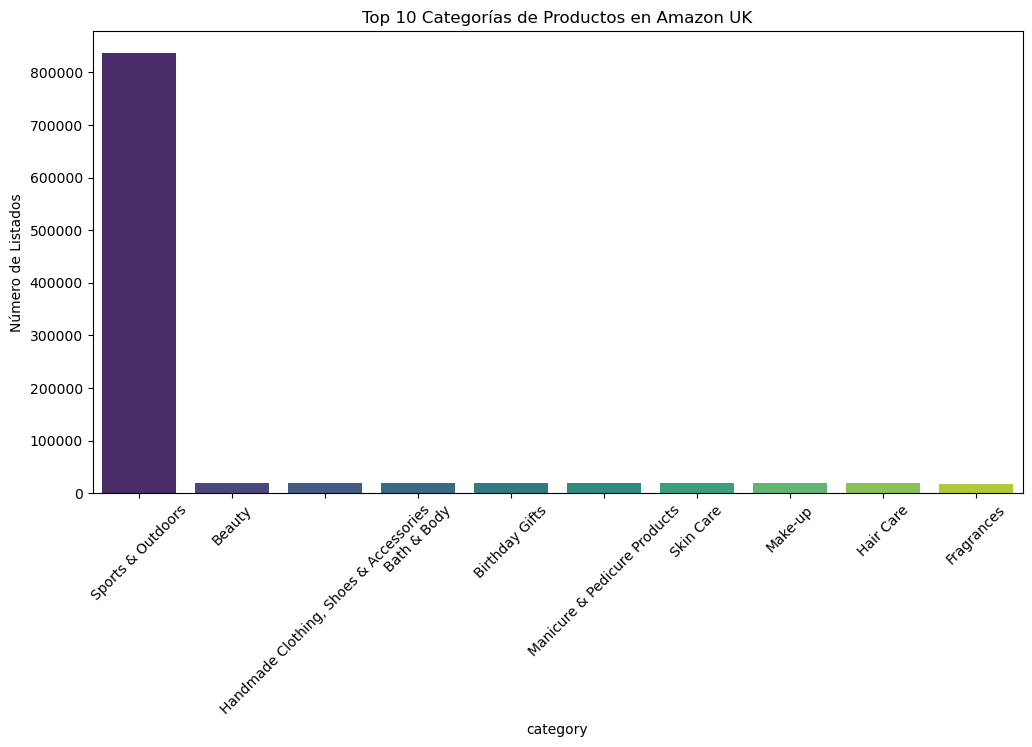

In [7]:
plt.figure(figsize=(12,6))
sns.barplot(x=category_counts.index[:10], y=category_counts.values[:10], palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Categorías de Productos en Amazon UK')
plt.ylabel('Número de Listados')
plt.show()


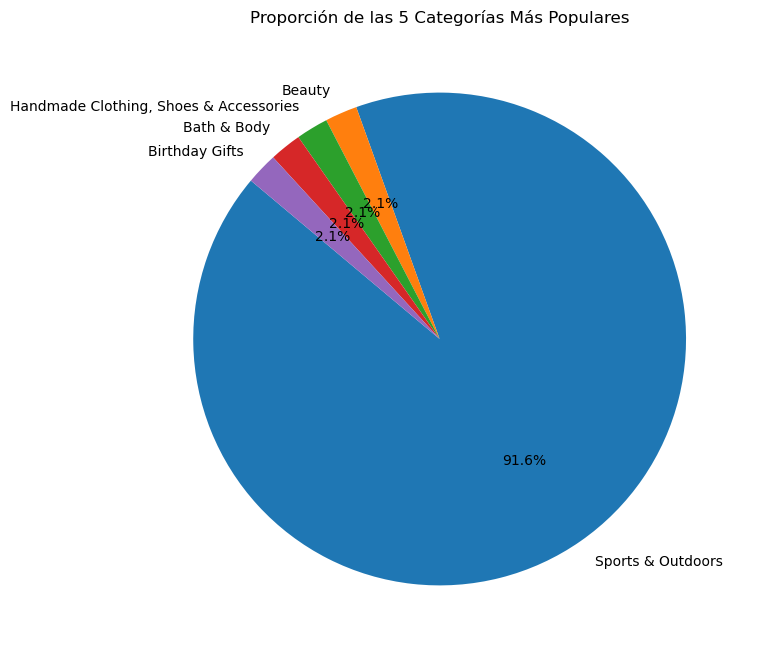

In [8]:
plt.figure(figsize=(8,8))
plt.pie(top5_categories.values, labels=top5_categories.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de las 5 Categorías Más Populares')
plt.show()


In [9]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price


(np.float64(89.24380943923663), 19.09, np.float64(9.99))

In [10]:
price_variance = df['price'].var()
price_std = df['price'].std()
price_range = df['price'].max() - df['price'].min()
price_iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)

price_variance, price_std, price_range, price_iqr


(119445.48532256528, 345.60886175352226, 100000.0, np.float64(36.0))

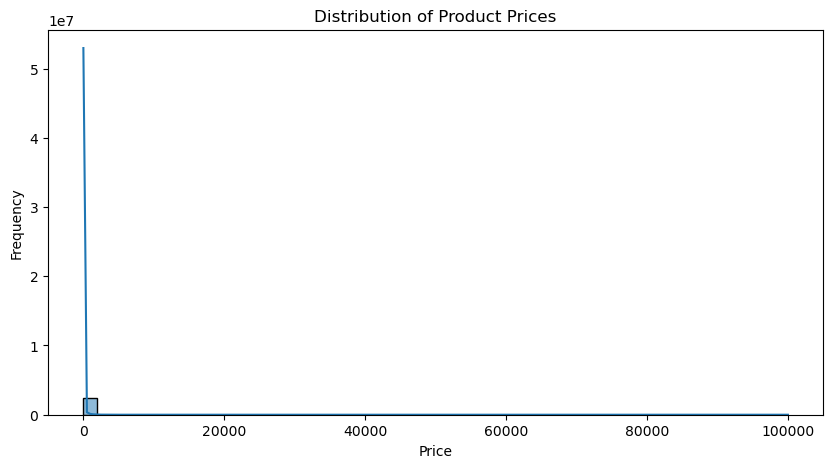

In [11]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


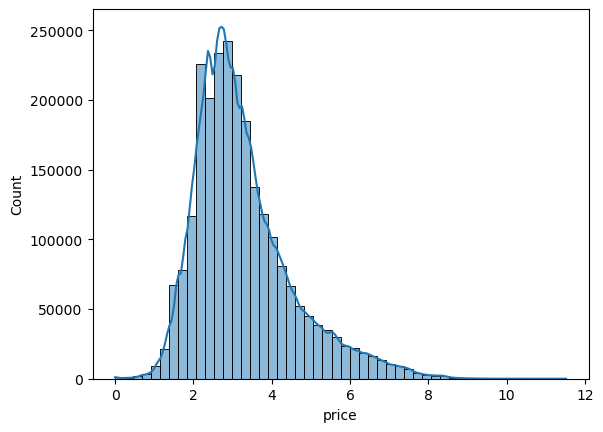

In [12]:
sns.histplot(np.log1p(df['price']), bins=50, kde=True)
plt.show()


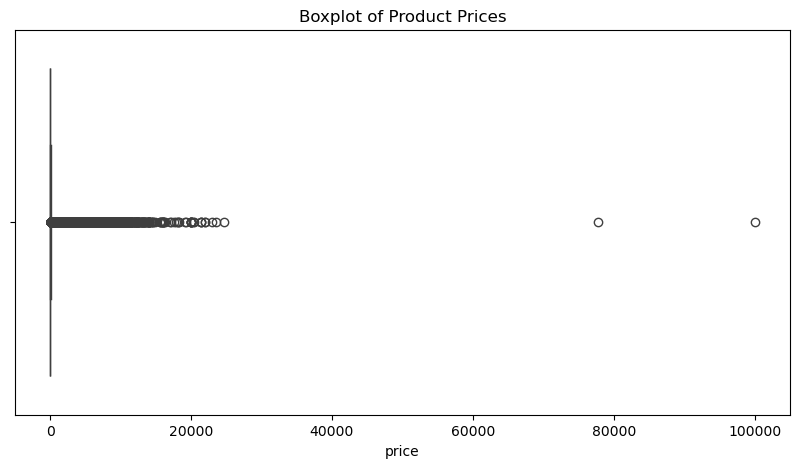

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Product Prices')
plt.show()


In [15]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating


(np.float64(2.152836472966065), 0.0, np.float64(0.0))

In [16]:
rating_variance = df['stars'].var()
rating_std = df['stars'].std()
rating_iqr = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)

rating_variance, rating_std, rating_iqr


(4.81743402976196, 2.1948653785054697, np.float64(4.4))

In [17]:
rating_skew = skew(df['stars'].dropna())
rating_kurtosis = kurtosis(df['stars'].dropna())

rating_skew, rating_kurtosis



(np.float64(0.08120730776283354), np.float64(-1.926004642549839))

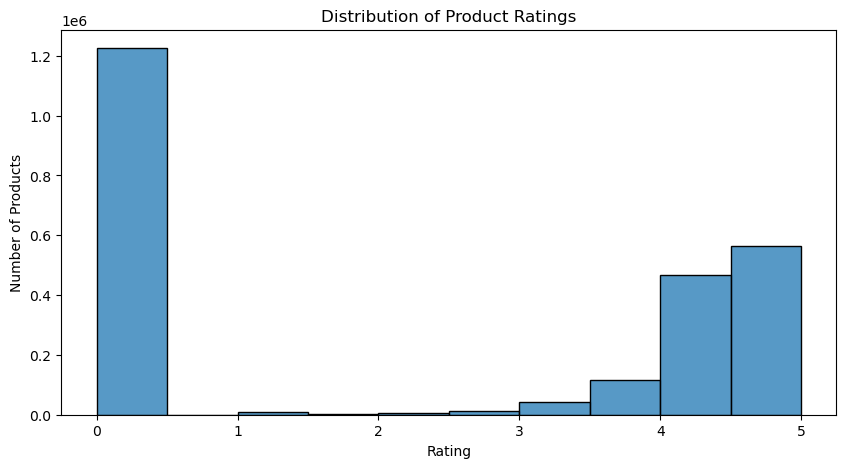

In [18]:
plt.figure(figsize=(10,5))
sns.histplot(df['stars'], bins=10, kde=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Products')
plt.show()
